# Hospital Respiratory Analysis

This dataset provides a comprehensive overview of weekly hospital respiratory data and metrics aggregated to national and state/territory levels, reported to the Centers for Disease Control and Prevention’s (CDC) National Health Safety Network (NHSN) from August 2020 through October 2024. The data includes metrics related to hospital capacity, occupancy, hospitalizations, and new admissions for COVID-19, Influenza, and Respiratory Syncytial Virus (RSV). The dataset captures both mandated and voluntary reporting periods, reflecting changes in reporting requirements by the Centers for Medicare and Medicaid Services (CMS).


## Import Libraries, Preferenbces and Helper Functions

### Import Libraries

In [15]:
# Import necessary libraries
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

### Preferences

In [2]:
# Suppress warnings
warnings.filterwarnings('ignore')

### Helper Functions

## Load the Data

In [3]:
data = pd.read_csv("../datasets/raw/raw_weekly_hospital_respiratory_data_2020_2024.csv")

# Display the first few rows of the data
data.head()

,Week Ending Date,Geographic aggregation,Number of Inpatient Beds,Number of Adult Inpatient Beds,Number of Pediatric Inpatient beds,Number of Inpatient Beds Occupied,Number of Adult Inpatient Beds Occupied,Number of Pediatric Inpatient Beds Occupied,Number of ICU Beds,Number of Adult ICU Beds,...,Absolute Change in the Percent Hospitals Reporting Adult RSV Admissions from Prior Week,Absolute Change in the Percent Hospitals Reporting RSV Admissions from Prior Week,Absolute Change in the Percent Hospitals Reporting Percent Inpatient Beds Occupied from Prior Week,Absolute Change in the Percent Hospitals Reporting Percent ICU Beds Occupied from Prior Week,Absolute Change in the Percent Hospitals Reporting Percent Inpatient Beds Occupied by COVID-19 Patients from Prior Week,Absolute Change in the Percent Hospitals Reporting Percent Inpatient Beds Occupied by Influenza Patients from Prior Week,Absolute Change in the Percent Hospitals Reporting Percent Inpatient Beds Occupied by RSV Patients from Prior Week,Absolute Change in the Percent Hospitals Reporting Percent ICU Beds Occupied by COVID-19 Patients from Prior Week,Absolute Change in the Percent Hospitals Reporting Percent ICU Beds Occupied by Influenza Patients from Prior Week,Absolute Change in the Percent Hospitals Reporting Percent ICU Beds Occupied by RSV Patients from Prior Week
0,2023-08-12,WA,10650.0,9282.0,482.0,9040.0,8117.0,339.0,1623.0,1059.0,...,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0
1,2023-08-12,WI,10752.0,9824.0,425.0,7574.0,7027.0,286.0,1566.0,1232.0,...,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0
2,2023-08-12,WV,4813.0,4556.0,256.0,3701.0,3562.0,139.0,639.0,595.0,...,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0
3,2023-08-12,WY,1318.0,1142.0,25.0,559.0,534.0,6.0,114.0,109.0,...,0.0,0.0,0.03,0.03,0.03,0.03,0.0,0.03,0.03,0.0
4,2023-08-19,AK,1354.0,1192.0,77.0,1054.0,939.0,43.0,184.0,126.0,...,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0


## Data Cleaning

### Remove White Spaces

In [4]:
# Remove leading and trailing whitespaces from column names
data.columns = data.columns.str.strip()

## Exploratory Data Analysis

### Summary Statistics

In [5]:
# Display summary statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Number of Inpatient Beds,12521.0,23993.299018,90605.539900,7.0,2726.0,8017.0,16381.0,834208.0
Number of Adult Inpatient Beds,12506.0,21658.877899,81756.939919,3.0,2329.0,7253.5,15006.5,746110.0
Number of Pediatric Inpatient beds,12485.0,1440.099880,5514.682973,0.0,145.0,439.0,910.0,73572.0
Number of Inpatient Beds Occupied,12521.0,27972.333040,808421.106845,0.0,1988.0,5465.0,12047.0,64044023.0
Number of Adult Inpatient Beds Occupied,12510.0,26482.350200,808070.108376,0.0,1757.0,5053.5,10975.5,64002654.0
...,...,...,...,...,...,...,...,...
Absolute Change in the Percent Hospitals Reporting Percent Inpatient Beds Occupied by Influenza Patients from Prior Week,12711.0,0.003557,0.077205,-1.0,0.0,0.0,0.0,1.0
Absolute Change in the Percent Hospitals Reporting Percent Inpatient Beds Occupied by RSV Patients from Prior Week,12711.0,0.003616,0.039475,-1.0,0.0,0.0,0.0,1.0
Absolute Change in the Percent Hospitals Reporting Percent ICU Beds Occupied by COVID-19 Patients from Prior Week,12711.0,0.000105,0.054399,-1.0,0.0,0.0,0.0,1.0
Absolute Change in the Percent Hospitals Reporting Percent ICU Beds Occupied by Influenza Patients from Prior Week,12711.0,0.003313,0.076576,-1.0,0.0,0.0,0.0,1.0


### Data Types

In [6]:
# Display data types of each column
data.dtypes

Week Ending Date                                                                                                             object
Geographic aggregation                                                                                                       object
Number of Inpatient Beds                                                                                                    float64
Number of Adult Inpatient Beds                                                                                              float64
Number of Pediatric Inpatient beds                                                                                          float64
                                                                                                                             ...   
Absolute Change in the Percent Hospitals Reporting Percent Inpatient Beds Occupied by Influenza Patients from Prior Week    float64
Absolute Change in the Percent Hospitals Reporting Percent Inpatient Beds Oc

### Data Shape

In [7]:
# Display the shape of the data
data.shape

(12768, 157)

### Visualizations

#### I. Percentage of Inpatient Beds Occupied by COVID-19 Patients

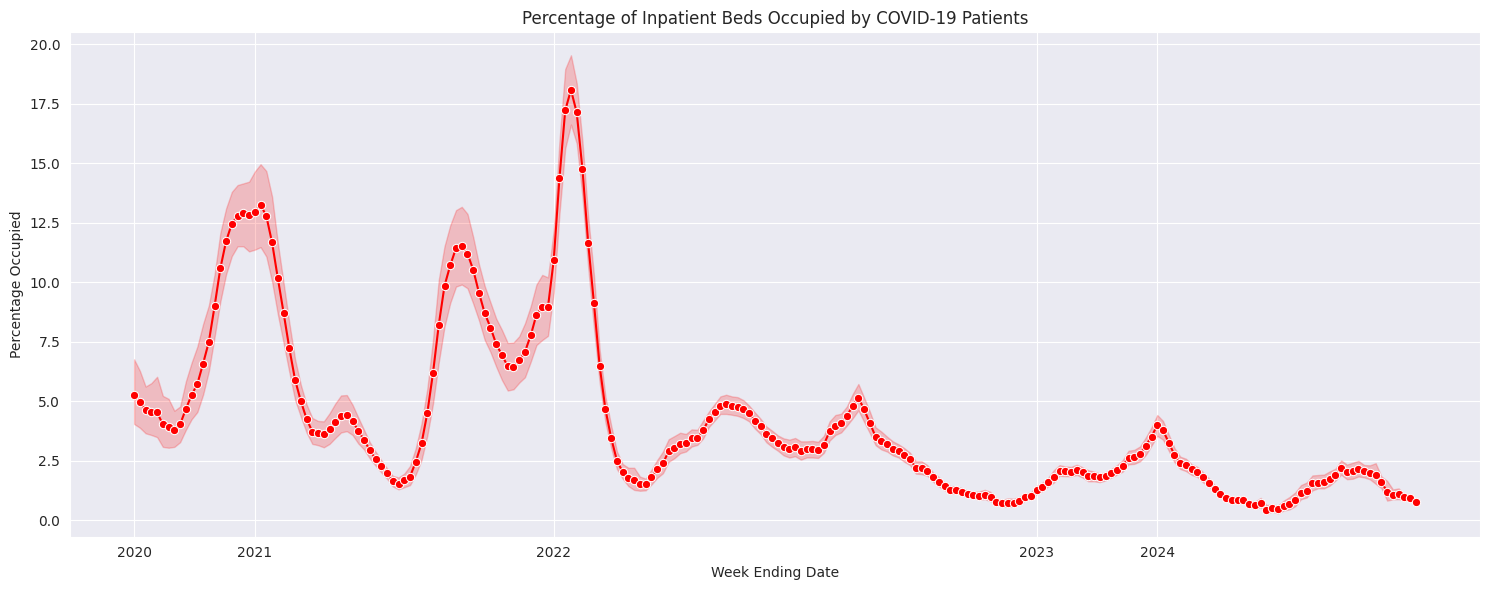

In [8]:
# Convert 'Week Ending Date' to datetime
data['Week Ending Date'] = pd.to_datetime(data['Week Ending Date'])

# Convert percentages from 0.25 to 25%
data['Percent Inpatient Beds Occupied by COVID-19 Patients'] *= 100

# Set the figure size
plt.figure(figsize=(15, 6))

# Use Seaborn to plot the data
sns.lineplot(x='Week Ending Date', y='Percent Inpatient Beds Occupied by COVID-19 Patients', data=data, marker='o', color='red')

# Set the title, x-axis label, and y-axis label
plt.title('Percentage of Inpatient Beds Occupied by COVID-19 Patients')
plt.xlabel('Week Ending Date')
plt.ylabel('Percentage Occupied')

# Customize x-axis ticks to show only the years
data['Week Ending Date'] = pd.to_datetime(data['Week Ending Date'])

# Get unique years and their first occurrences
unique_years = data['Week Ending Date'].dt.year.unique()
tick_positions = [data[data['Week Ending Date'].dt.year == year]['Week Ending Date'].iloc[0] for year in unique_years]
tick_labels = unique_years

# Set the x-axis ticks and labels
plt.xticks(ticks=tick_positions, labels=tick_labels)

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

#### II. Comparison of ICU Bed Occupancy by Disease (COVID-19, Influenza, RSV)

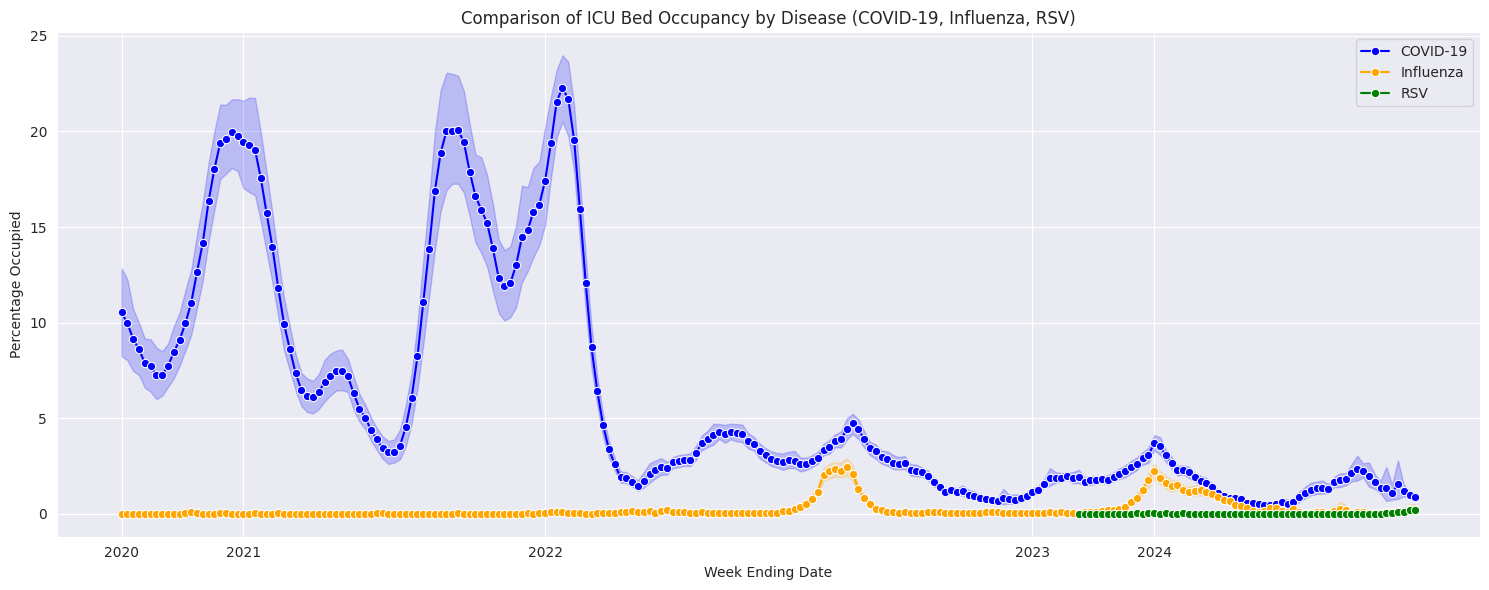

In [9]:
# Convert 'Week Ending Date' to datetime
data['Week Ending Date'] = pd.to_datetime(data['Week Ending Date'])

# Convert percentages from 0.25 to 25%
data['Percent ICU Beds Occupied by COVID-19 Patients'] *= 100
data['Percent ICU Beds Occupied by Influenza Patients'] *= 100
data['Percent ICU Beds Occupied by RSV Patients'] *= 100

# Set the figure size
plt.figure(figsize=(15, 6))

# Use Seaborn to plot the data
sns.lineplot(x='Week Ending Date', y='Percent ICU Beds Occupied by COVID-19 Patients', data=data, marker='o', label='COVID-19', color='blue')
sns.lineplot(x='Week Ending Date', y='Percent ICU Beds Occupied by Influenza Patients', data=data, marker='o', label='Influenza', color='orange')
sns.lineplot(x='Week Ending Date', y='Percent ICU Beds Occupied by RSV Patients', data=data, marker='o', label='RSV', color='green')

# Set the title, x-axis label, and y-axis label
plt.title('Comparison of ICU Bed Occupancy by Disease (COVID-19, Influenza, RSV)')
plt.xlabel('Week Ending Date')
plt.ylabel('Percentage Occupied')

# Customize x-axis ticks to show only the years
unique_years = data['Week Ending Date'].dt.year.unique()
tick_positions = [data[data['Week Ending Date'].dt.year == year]['Week Ending Date'].iloc[0] for year in unique_years]
tick_labels = unique_years
plt.xticks(ticks=tick_positions, labels=tick_labels)

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

#### III. Total Patients Hospitalized with COVID-19 Over Time

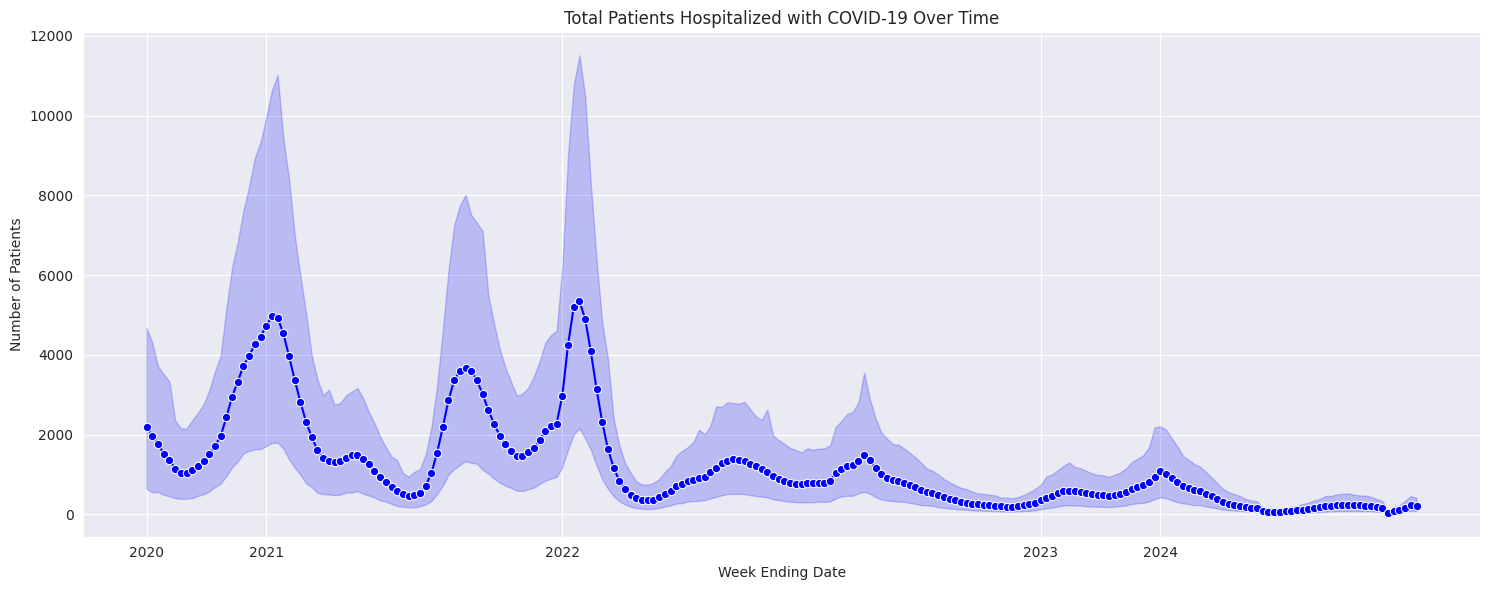

In [10]:
# Convert 'Week Ending Date' to datetime
data['Week Ending Date'] = pd.to_datetime(data['Week Ending Date'])

# Set the figure size
plt.figure(figsize=(15, 6))

# Use Seaborn to plot the data
sns.lineplot(x='Week Ending Date', y='Total Patients Hospitalized with COVID-19', data=data, marker='o', color='blue')

# Set the title, x-axis label, and y-axis label
plt.title('Total Patients Hospitalized with COVID-19 Over Time')
plt.xlabel('Week Ending Date')
plt.ylabel('Number of Patients')

# Customize x-axis ticks to show only the years
unique_years = data['Week Ending Date'].dt.year.unique()
tick_positions = [data[data['Week Ending Date'].dt.year == year]['Week Ending Date'].iloc[0] for year in unique_years]
tick_labels = unique_years
plt.xticks(ticks=tick_positions, labels=tick_labels)

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

#### IV. Distribution of Pediatric COVID-19 Admissions by Age Group

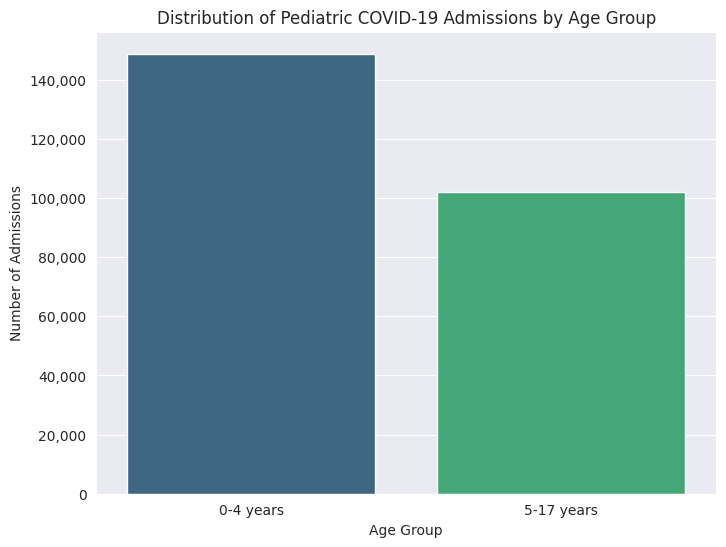

In [18]:
# Create a DataFrame for the distribution
ped_covid_admissions = pd.DataFrame({
    'Age Group': ['0-4 years', '5-17 years'],
    'Admissions': [data['Number of Pediatric COVID-19 Admissions, 0-4 years'].sum(), data['Number of Pediatric COVID-19 Admissions, 5-17 years'].sum()]
})

# Set the figure size
plt.figure(figsize=(8, 6))

# Use Seaborn to plot the data
sns.barplot(x='Age Group', y='Admissions', data=ped_covid_admissions, palette='viridis')

# Set the title, x-axis label, and y-axis label
plt.title('Distribution of Pediatric COVID-19 Admissions by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Admissions')

# Remove scientific notation
plt.gca().yaxis.set_major_formatter(mticker.ScalarFormatter())
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Display the plot
plt.show()

#### V. Comparison of Total ICU Patients Hospitalized with COVID-19, Influenza, and RSV

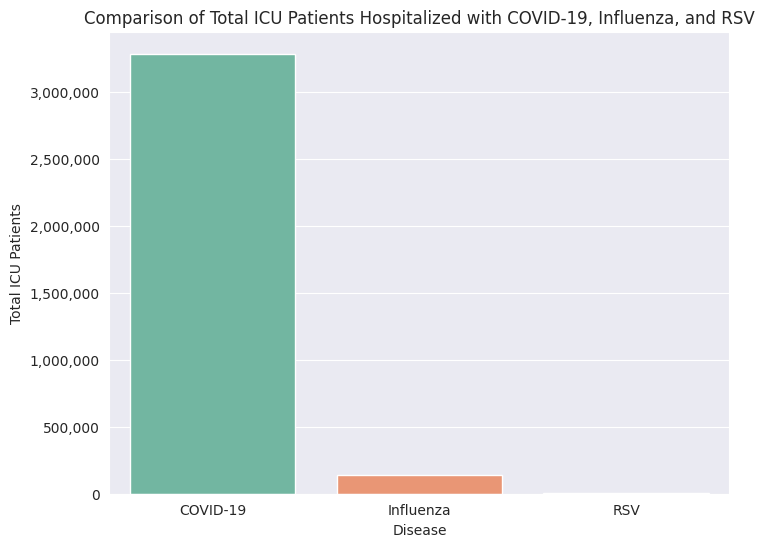

In [17]:
# Create a DataFrame for the comparison
icu_patients = pd.DataFrame({
    'Disease': ['COVID-19', 'Influenza', 'RSV'],
    'Total ICU Patients': [data['Total ICU Patients Hospitalized with COVID-19'].sum(), data['Total ICU Patients Hospitalized with Influenza'].sum(), data['Total ICU Patients Hospitalized with RSV'].sum()]
})

# Set the figure size
plt.figure(figsize=(8, 6))

# Use Seaborn to plot the data
sns.barplot(x='Disease', y='Total ICU Patients', data=icu_patients, palette='Set2')

# Set the title, x-axis label, and y-axis label
plt.title('Comparison of Total ICU Patients Hospitalized with COVID-19, Influenza, and RSV')
plt.xlabel('Disease')
plt.ylabel('Total ICU Patients')

# Remove scientific notation
plt.gca().yaxis.set_major_formatter(mticker.ScalarFormatter())
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Display the plot
plt.show()

#### VI. Percentage of Adult and Pediatric COVID-19 Admissions

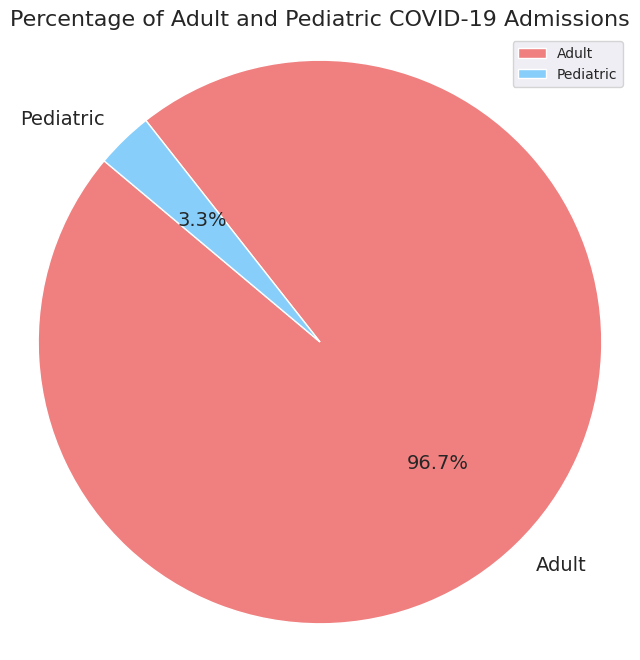

In [13]:
# Calculate percentages
total_adult_covid_admissions = data['Total Adult COVID-19 Admissions'].sum()
total_ped_covid_admissions = data['Total Pediatric COVID-19 Admissions'].sum()
total_covid_admissions = total_adult_covid_admissions + total_ped_covid_admissions

percent_adult = (total_adult_covid_admissions / total_covid_admissions) * 100
percent_ped = (total_ped_covid_admissions / total_covid_admissions) * 100

# Plotting
labels = ['Adult', 'Pediatric']
sizes = [percent_adult, percent_ped]
colors = ['lightcoral', 'lightskyblue']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 14})
plt.title('Percentage of Adult and Pediatric COVID-19 Admissions', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a legend
plt.legend(labels, loc="best")

# Display the plot
plt.show()

#### VII. Geographic Distribution of Total Patients Hospitalized with COVID-19

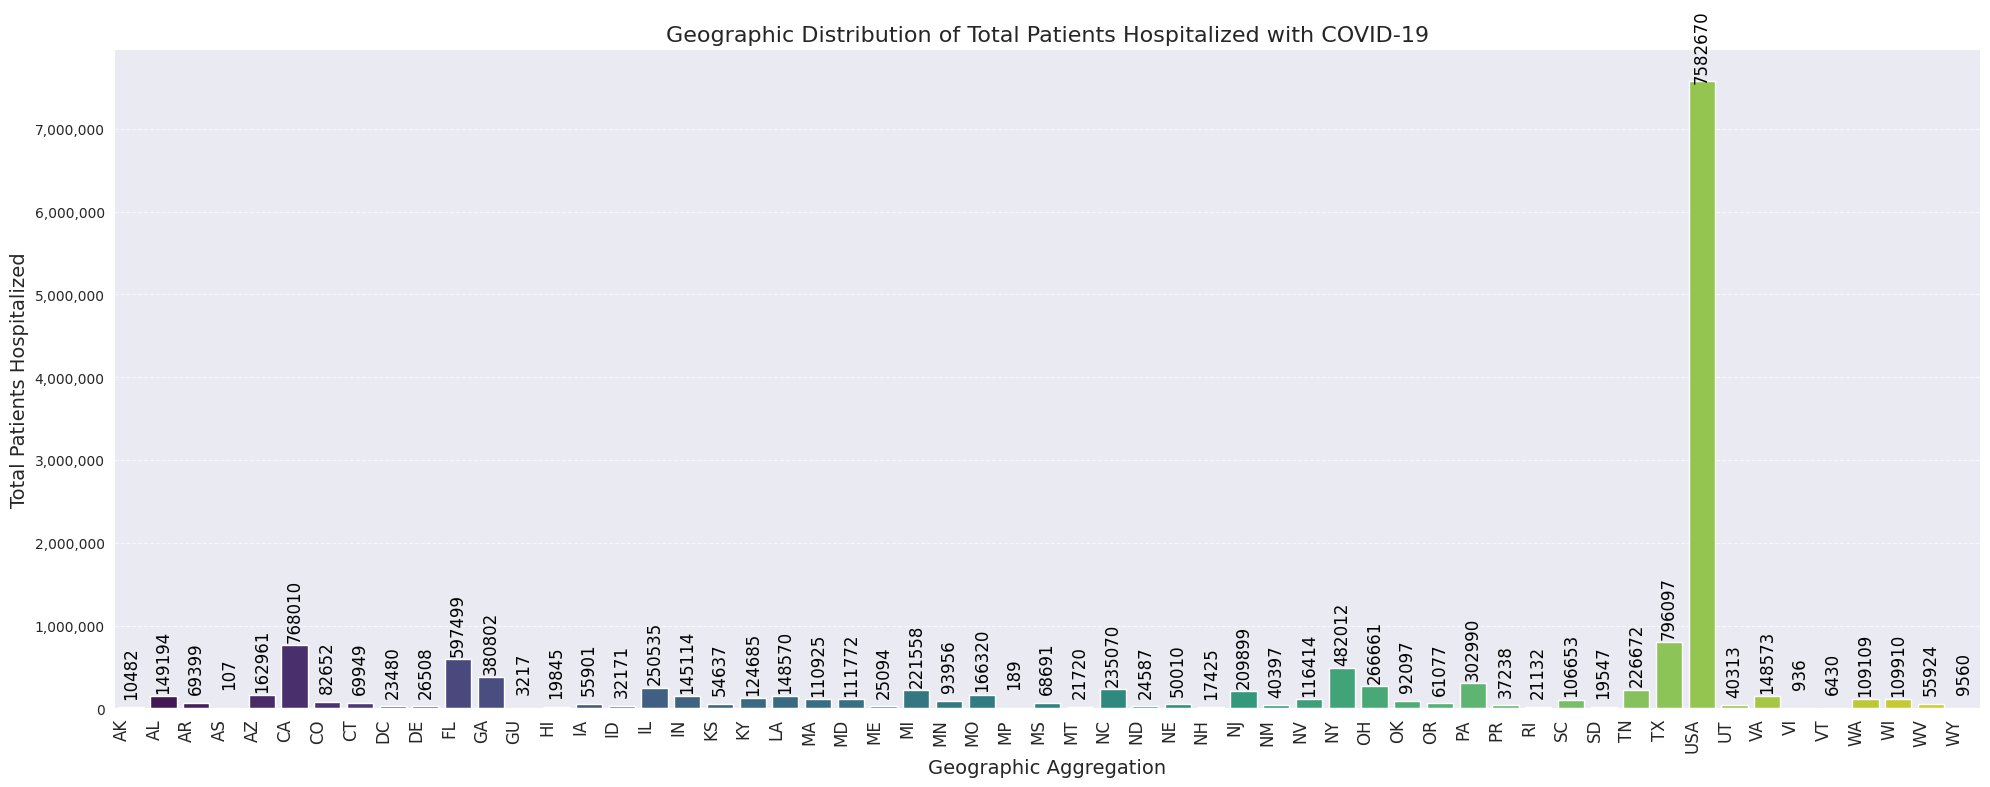

In [16]:
# Group by geographic aggregation
geo_distribution = data.groupby('Geographic aggregation')['Total Patients Hospitalized with COVID-19'].sum().reset_index()

# Set the figure size
plt.figure(figsize=(20, 8))

# Use Seaborn to plot the data
sns.barplot(x='Geographic aggregation', y='Total Patients Hospitalized with COVID-19', data=geo_distribution, palette='viridis')

# Set the title, x-axis label, and y-axis label
plt.title('Geographic Distribution of Total Patients Hospitalized with COVID-19', fontsize=16)
plt.xlabel('Geographic Aggregation', fontsize=14)
plt.ylabel('Total Patients Hospitalized', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='right', fontsize=12)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels on top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=12, color='black', xytext=(0, 25),
                       textcoords='offset points', rotation=90)

# Remove scientific notation
plt.gca().yaxis.set_major_formatter(mticker.ScalarFormatter())
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Display the plot
plt.tight_layout()
plt.show()